In [124]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
LABELS = ['Normal','Fraud']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix, precision_recall_curve

In [84]:
df = pd.read_csv('./creditcardfraud/creditcard.csv')

### EDA

In [ ]:
#check for null values
df.isnull().values.any()

0    284315
1       492
Name: Class, dtype: int64


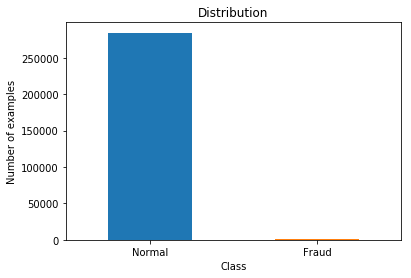

In [35]:
#check for class imbalance 
count = pd.value_counts(df['Class'])
count.plot(kind='bar', rot=0, title='Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Number of examples')
print(count)

In [58]:
#check how amount varies with class (normal/fraud)
frauds_example = df[df['Class']==1]
normal_example = df[df['Class']==0]

In [59]:
frauds_example.shape

(492, 31)

In [60]:
normal_example.shape

(284315, 31)

(0, 20000)

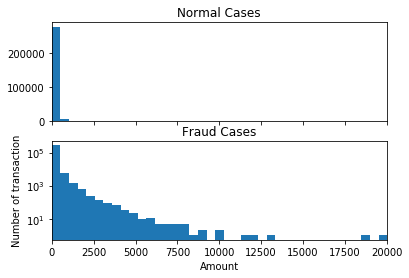

In [66]:
#checking variation of amounts with fraud/normal cases
f,(sub1,sub2) = plt.subplots(2,1,sharex=True)

sub1.hist(normal_example['Amount'],bins=50)
sub1.set_title('Normal Cases')

sub2.hist(normal_example['Amount'], bins=50)
sub2.set_title('Fraud Cases')

plt.xlabel('Amount')
plt.ylabel('Number of transaction')
plt.yscale('log')
plt.xlim((0,20000))

### Preparing Data

In [78]:
#Normalize
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

X_train,X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test  = X_test.values

In [79]:
X_train.shape

(227451, 29)

### Model

In [86]:
input_dim = X_train.shape[1]
encoding_dim=7

input_layer = Input(shape=(input_dim,), )

encoder_1 = Dense(2*encoding_dim, activation="tanh" )(input_layer)
encoder_2 = Dense(encoding_dim, activation='relu')(encoder_1)

decoder_1 = Dense(encoding_dim, activation='relu')(encoder_2)
decoder_2 = Dense(2*encoding_dim, activation='tanh')(decoder_1)
out = Dense(input_dim)(decoder_2)

auto_encoder = Model(inputs=input_layer, outputs=out)

### Training

In [89]:
auto_encoder.compile(optimizer='adam',loss='mean_squared_error',metrics= ['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath='save.h5',save_best_only=True)

tensorboard = TensorBoard(log_dir='./log',histogram_freq=0)

History = auto_encoder.fit(X_train,X_train, 
                 batch_size=32, 
                 epochs=500, 
                 callbacks=[tensorboard, modelcheckpoint],
                 shuffle=True,
                 verbose=1,
                 validation_data=(X_test,X_test)).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.3000 - acc: 0.6788 - val_loss: 0.3334 - val_acc: 0.6723
Epoch 2/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.3028 - acc: 0.6783 - val_loss: 0.3317 - val_acc: 0.6831
Epoch 3/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.3005 - acc: 0.6801 - val_loss: 0.3365 - val_acc: 0.6831
Epoch 4/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2993 - acc: 0.6795 - val_loss: 0.3383 - val_acc: 0.6863
Epoch 5/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.3021 - acc: 0.6783 - val_loss: 0.3327 - val_acc: 0.6845
Epoch 6/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.3007 - acc: 0.6782 - val_loss: 0.3314 - val_acc: 0.6830
Epoch 7/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.2997 - acc: 0.6796

227451/227451 [==============================] - 21s 91us/step - loss: 0.3013 - acc: 0.6822 - val_loss: 0.3409 - val_acc: 0.6805
Epoch 59/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2985 - acc: 0.6836 - val_loss: 0.3308 - val_acc: 0.6843
Epoch 60/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2984 - acc: 0.6832 - val_loss: 0.3372 - val_acc: 0.6812
Epoch 61/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2992 - acc: 0.6821 - val_loss: 0.3431 - val_acc: 0.6841
Epoch 62/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2987 - acc: 0.6844 - val_loss: 0.3410 - val_acc: 0.6818
Epoch 63/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2997 - acc: 0.6827 - val_loss: 0.3394 - val_acc: 0.6697
Epoch 64/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2983 - acc: 0.6835 - val_loss: 0.3327 - val_acc: 0.6840
Epoch 65/500
227451

227451/227451 [==============================] - 21s 91us/step - loss: 0.2970 - acc: 0.6860 - val_loss: 0.3269 - val_acc: 0.6909
Epoch 116/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2964 - acc: 0.6853 - val_loss: 0.3397 - val_acc: 0.6891
Epoch 117/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2958 - acc: 0.6868 - val_loss: 0.3432 - val_acc: 0.6793
Epoch 118/500
227451/227451 [==============================] - 20s 90us/step - loss: 0.2980 - acc: 0.6851 - val_loss: 0.3282 - val_acc: 0.6892
Epoch 119/500
227451/227451 [==============================] - 20s 90us/step - loss: 0.2953 - acc: 0.6871 - val_loss: 0.3290 - val_acc: 0.6854
Epoch 120/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.2963 - acc: 0.6862 - val_loss: 0.3342 - val_acc: 0.6837
Epoch 121/500
227451/227451 [==============================] - 20s 88us/step - loss: 0.2960 - acc: 0.6867 - val_loss: 0.3250 - val_acc: 0.6887
Epoch 122/500

227451/227451 [==============================] - 21s 90us/step - loss: 0.2954 - acc: 0.6860 - val_loss: 0.3283 - val_acc: 0.6842
Epoch 173/500
227451/227451 [==============================] - 20s 90us/step - loss: 0.2953 - acc: 0.6855 - val_loss: 0.3288 - val_acc: 0.6806
Epoch 174/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2937 - acc: 0.6871 - val_loss: 0.3240 - val_acc: 0.6918
Epoch 175/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2943 - acc: 0.6863 - val_loss: 0.3231 - val_acc: 0.6904
Epoch 176/500
227451/227451 [==============================] - 21s 90us/step - loss: 0.2948 - acc: 0.6862 - val_loss: 0.3378 - val_acc: 0.6817
Epoch 177/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.2940 - acc: 0.6864 - val_loss: 0.3258 - val_acc: 0.6819
Epoch 178/500
227451/227451 [==============================] - 21s 91us/step - loss: 0.2947 - acc: 0.6863 - val_loss: 0.3242 - val_acc: 0.6915
Epoch 179/500

KeyboardInterrupt: 

In [94]:
model = load_model('save.h5')

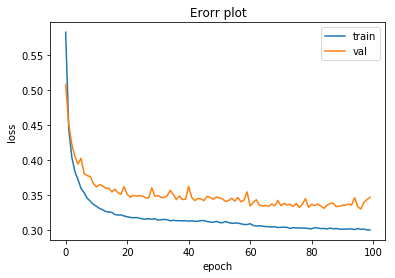

In [97]:
plt.plot(History['loss'])
plt.plot(History['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Erorr plot')
plt.legend(['train','val'], loc='upper right')

### Prediction
Prediction - Since our model has learned to give very low error on normal transaction. When we pass a fraud transaction 
ideally it should give higher error. So, we set a threshold value if any transaction is higher that this value, 
we flag it as fraud.

In [99]:
predictions = model.predict(X_test)
#error
error = np.mean(np.power(X_test-predictions,2),axis=1)
error_df = pd.DataFrame({
    'error' : error,
    'ground_truth' : y_test
})

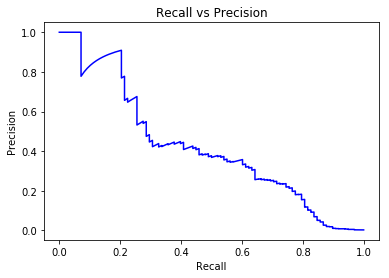

In [100]:
#Precision, recall curve
precision, recall, th = precision_recall_curve(error_df.ground_truth, error_df.error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
threshold = 2.5
y_pred = [1 if e > threshold else 0 for e in error_df.error.values]

cmatrix = confusion_matrix(error_df.ground_truth.values , np.array(y_pred))

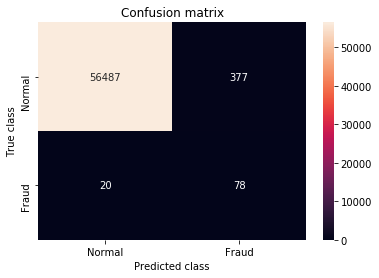

In [126]:
sns.heatmap(cmatrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Results

'''The model was able to catch a majority of fraud detection cases (78/98) in test data. But it also flaged a lot of normal cases(377) as fraud. '''